<a href="https://colab.research.google.com/github/YI-CHENG-SHIH645/ML-in-Business_practice/blob/master/Intro/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/master/utils.py"

from itertools import product
from math import sqrt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from utils import DataLoader
from utils import display_side_by_side as display_sbs

--2021-10-15 21:06:50--  https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/master/utils.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML-in-Business_practice/master/utils.py [following]
--2021-10-15 21:06:50--  https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML-in-Business_practice/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8016 (7.8K) [text/plain]
Saving to: ‘utils.py.5’

utils.py.5          100%[===================>]   7.83K  --.-KB/s    in 0s      

2021-10-15 21:06:50 (75.5 MB/s) - ‘utils.py.5’ saved [8016/8016]



EXERCISES 1.11

In [2]:
trai = DataLoader.load_data('age_salary_url', 'train')
vali = DataLoader.load_data('age_salary_url', 'val')
test = DataLoader.load_data('age_salary_url', 'test')

trai.name = 'train'
vali.name = 'val'
test.name = 'test'

In [3]:
display_sbs([trai, vali, test],
            ['train', 'vali', 'test'])

train,vali,test
,Age,Salary
0,25,135000
1,55,260000
2,27,105000
3,35,220000
4,60,240000
5,65,265000
6,45,270000
7,40,300000
8,50,265000


In [4]:
models = {}
loss_table = pd.DataFrame()

x_trai, y_trai = trai.Age, trai.Salary
x_vali, y_vali = vali.Age, vali.Salary
for deg in range(5, 0, -1):
    poly = np.poly1d(np.polyfit(x_trai, y_trai, deg))
    model_name = 'poly_'+str(deg)
    models[model_name] = poly
    loss_table.loc['trai', model_name] = sqrt(mean_squared_error(y_true=y_trai, y_pred=poly(x_trai)))
    loss_table.loc['vali', model_name] = sqrt(mean_squared_error(y_true=y_vali, y_pred=poly(x_vali)))
display(loss_table.astype(int))

,poly_5,poly_4,poly_3,poly_2,poly_1
trai,12240,20704,30346,31242,47179
vali,36832,35530,36187,34348,50590


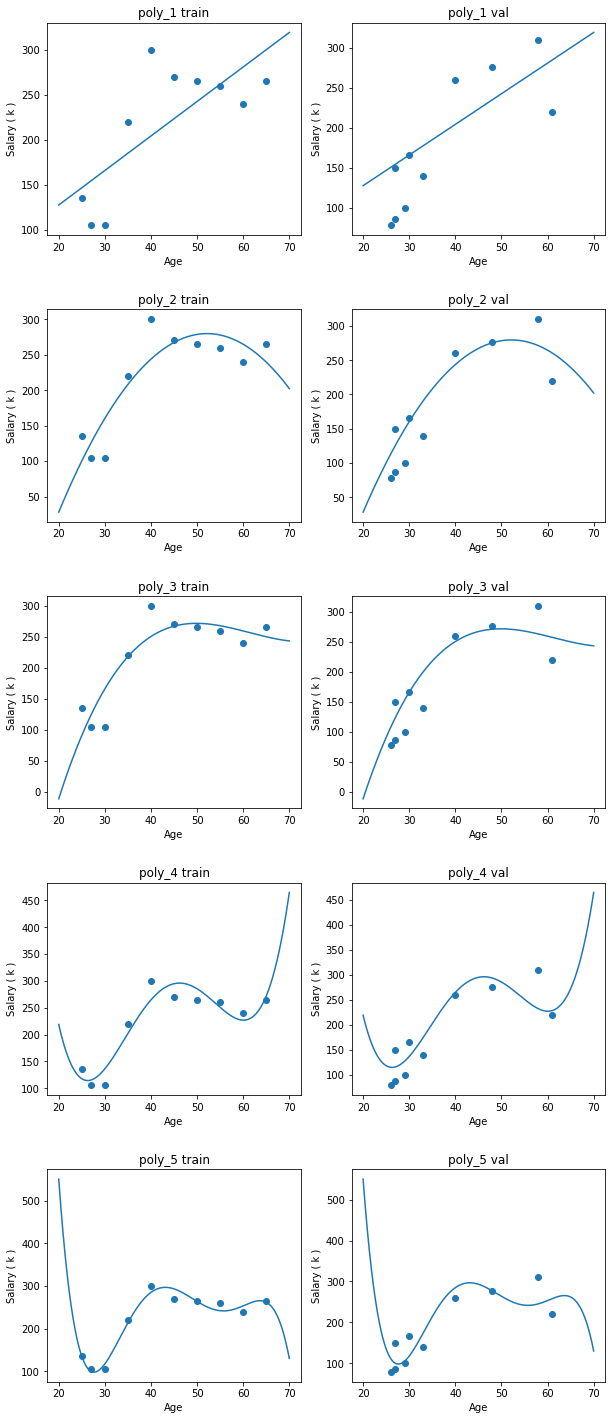

In [5]:
fig = plt.figure(figsize=(10, 25))
v_range = range(1, loss_table.shape[1]+1)
h_range = range(1, loss_table.shape[0]+1)
age_samples = np.linspace(20, 70, num=1000)

for nth, (i, j) in enumerate(product(v_range, h_range)):
    ds = trai if j%2 == 1 else vali
    ax = fig.add_subplot(loss_table.shape[1], loss_table.shape[0], nth+1)

    salary_samples = pd.Series([models['poly_' + str(i)](age) for age in age_samples])
    ax.plot(age_samples, salary_samples/1000)  # line
    ax.scatter(ds.Age, ds.Salary/1000)  # dots

    ax.set_title('poly_' + str(i) + ' ' + ds.name)
    ax.set_xlabel('Age')
    ax.set_ylabel('Salary ( k )')

plt.subplots_adjust(hspace=0.35)
plt.show()

In [6]:
int(sqrt(mean_squared_error(y_true=test.Salary, y_pred=models['poly_2'](test.Age))))

35005